In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

import altair as alt

alt.renderers.enable('notebook')

import numpy as np
import dill
import pandas as pd
import matplotlib.pyplot as plt



In [3]:

def load_pkl(filename):
    with open(filename,'rb') as fobj:
        df = dill.load(fobj)
    return df

In [4]:
data = load_pkl('total_df')

In [5]:
data['relative_proportion'] = np.nan

In [6]:
data[(data.year==1996) & (data.sex=='M') & (data.division=='16-19') & (data.bin=='0-5_under')].proportion.values[0]

0.02564102564102564

In [88]:
test_dict = {}
test_dict['a'] = [1, 1, 1, 2, 2, 2]
test_dict['b'] = [0, 0, 0, 0, 0, 0]
test_dict['c'] = [1, 0, 0, 1, 0, 0]
test_dict['d'] = [5, 0, 0, 4, 0, 0]
test_df = pd.DataFrame(data = test_dict)

In [89]:
test_df

,a,b,c,d
0,1,0,1,5
1,1,0,0,0
2,1,0,0,0
3,2,0,1,4
4,2,0,0,0
5,2,0,0,0


In [74]:
test_df.a.unique()

array([1, 2], dtype=int64)

In [ ]:
test_df.loc[test_df.a==let & test_df.c==1,a]

In [87]:
test_df.loc[(test_df.a==let) & (test_df.c==1),'d'].values[0] +1

5.0

In [90]:
for let in test_df.a.unique():
    test_df.loc[test_df.a==let,'b'] = test_df.loc[(test_df.a==let) & (test_df.c==1),'d'].values[0]+1
print(test_df)

   a  b  c  d
0  1  6  1  5
1  1  6  0  0
2  1  6  0  0
3  2  5  1  4
4  2  5  0  0
5  2  5  0  0


In [7]:
data['split_age'] = np.nan
data.loc[(data.division=='16-19') | (data.division=='20-24') | (data.division=='25-29') | (data.division=='30-34') | (data.division=='35-39'),'split_age'] = '16-39'
data.loc[(data.division!='16-19') & (data.division!='20-24') & (data.division!='25-29') & (data.division!='30-34') & (data.division!='35-39'),'split_age'] = '40+'

In [8]:
data_trunc = data.loc[data.year > 2007]

In [14]:
data_trunc.head()

,year,sex,division,bin,number,proportion,relative_proportion,split_age
2016,2008,M,16-19,10-15_under,0,0.000000,NaN,16-39
2017,2008,M,16-19,5-10_under,1,0.006173,NaN,16-39
2018,2008,M,16-19,0-5_under,1,0.006173,NaN,16-39
2019,2008,M,16-19,0-5_over,3,0.018519,NaN,16-39
2020,2008,M,16-19,5-10_over,1,0.006173,NaN,16-39


In [16]:
data_agg = data_trunc.groupby(['year','split_age', 'sex', 'bin']).proportion.sum()

In [17]:
data_agg

year  split_age  sex  bin        
2008  16-39      M    0-5_over       0.087032
                      0-5_under      0.078317
                      10-15_over     0.102882
                      10-15_under    0.036670
                      5-10_over      0.076969
                      5-10_under     0.050471
                 W    0-5_over       0.197237
                      0-5_under      0.217623
                      10-15_over     0.300371
                      10-15_under    0.141982
                      5-10_over      0.248113
                      5-10_under     0.152849
      40+        M    0-5_over       0.140244
                      0-5_under      0.163564
                      10-15_over     0.195382
                      10-15_under    0.068037
                      5-10_over      0.181408
                      5-10_under     0.099698
                 W    0-5_over       1.058206
                      0-5_under      0.667936
                      10-15_over     1.017460


In [18]:
data_agg.xs('0-5_under',
...       level='bin').unstack().unstack()

sex               M                   W          
split_age     16-39       40+     16-39       40+
year                                             
2008       0.078317  0.163564  0.217623  0.667936
2009       0.145923  0.405426  0.342196  1.058685
2010       0.101841  0.176177  0.190235  0.701010
2011       0.076102  0.211048  0.174706  0.722185
2012       0.090008  0.309861  0.264984       inf
2013       0.099425  0.239689  0.223031  1.095127
2014       0.114157  0.250131  0.229310  1.375134
2015       0.115438  0.234691  0.220698  0.711735
2016       0.109573  0.235852  0.218406  1.132311
2017       0.090694  0.177363  0.208412  0.844843
2018       0.112893  0.354391  0.220103  0.711514
2019       0.165538  0.237568  0.276146       inf

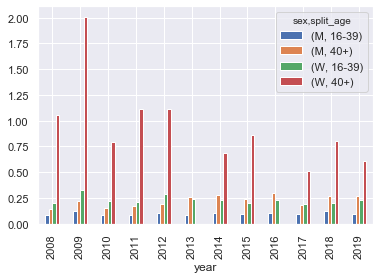

In [19]:
data_agg.xs('0-5_over',
...       level='bin').unstack().unstack().plot(kind='bar')

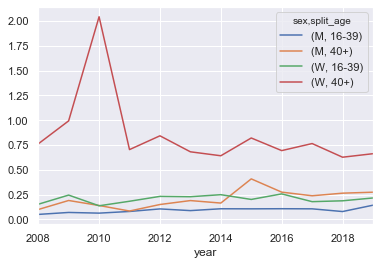

In [20]:
data_agg.xs('5-10_under',
...       level='bin').unstack().unstack().plot(kind='line')

In [15]:
data_agg.xs(('0-5_under'),
...       level=['sex', 'bin']).unstack().plot(kind='line')

AssertionError: Key for location must have same length as number of levels

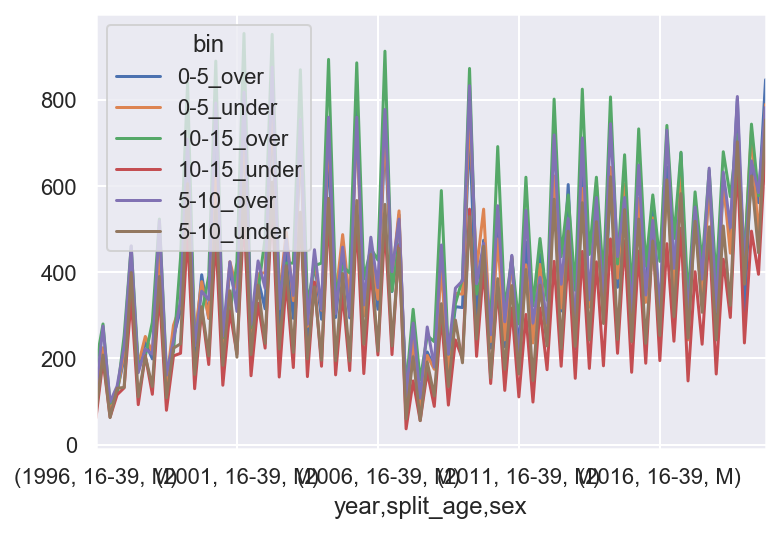

In [50]:
data_agg.unstack().plot(kind='line')

In [44]:
alt.Chart(data_agg).mark_line().encode(
    x='year',
    y='number',
    color='bin'
)

C:\Users\night\Anaconda3\envs\TDITest\lib\site-packages\altair\vegalite\v3\api.py:97: UserWarning: data of type <class 'pandas.core.series.Series'> not recognized
  warnings.warn("data of type {} not recognized".format(type(data)))


ValueError: bin encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

alt.Chart(...)

In [45]:
type(data_agg)

pandas.core.series.Series

In [35]:
young_agg = young_df.groupby(['year','sex', 'bin']).number.sum()
old_agg = old_df.groupby(['year','sex', 'bin']).number.sum()

In [36]:
young_agg

year  sex  bin        
1996  M    0-5_over       108
           0-5_under      116
           10-15_over     187
           10-15_under     62
           5-10_over      123
           5-10_under      75
      W    0-5_over       220
           0-5_under      225
           10-15_over     280
           10-15_under    196
           5-10_over      275
           5-10_under     208
1997  M    0-5_over       200
           0-5_under      215
           10-15_over     253
           10-15_under    132
           5-10_over      228
           5-10_under     133
      W    0-5_over       377
           0-5_under      414
           10-15_over     460
           10-15_under    339
           5-10_over      461
           5-10_under     399
1998  M    0-5_over       199
           0-5_under      215
           10-15_over     284
           10-15_under    117
           5-10_over      210
           5-10_under     135
                         ... 
2017  W    0-5_over       554
           0-5_un

In [5]:
for year in data.year.unique():
    for sex in ['M', 'W']:
        for division in data.division.unique():
            bq_prop = data[(data.year==year) & (data.sex==sex) & (data.division==division) & (data.bin=='10-15_over')].proportion.values[0]
#             test_df.loc[test_df.a==let,'b'] = test_df.loc[(test_df.a==let) & (test_df.c==1),'d'].values[0]+1
            data.loc[(data.year==year) & (data.sex==sex) & (data.division==division),'relative_proportion'] = \
            data.loc[(data.year==year) & (data.sex==sex) & (data.division==division),'proportion'] / bq_prop

In [6]:
data

,year,sex,division,bin,number,proportion,relative_proportion
0,1996,M,16-19,10-15_under,1,0.025641,0.250000
1,1996,M,16-19,5-10_under,0,0.000000,0.000000
2,1996,M,16-19,0-5_under,1,0.025641,0.250000
3,1996,M,16-19,0-5_over,2,0.051282,0.500000
4,1996,M,16-19,5-10_over,2,0.051282,0.500000
5,1996,M,16-19,10-15_over,4,0.102564,1.000000
6,1996,W,16-19,10-15_under,1,0.040000,0.500000
7,1996,W,16-19,5-10_under,3,0.120000,1.500000
8,1996,W,16-19,0-5_under,7,0.280000,3.500000
9,1996,W,16-19,0-5_over,2,0.080000,1.000000


In [12]:
source = data[(data.division=='25-29') & (data.sex=='M') & (data.year>2007)]

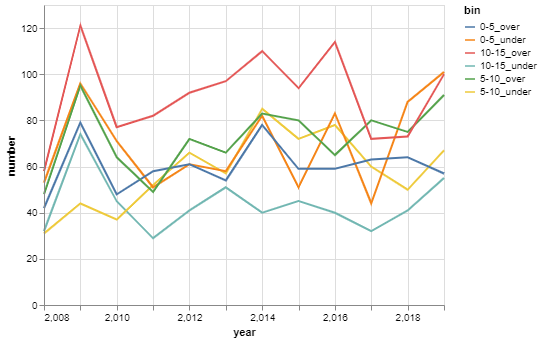

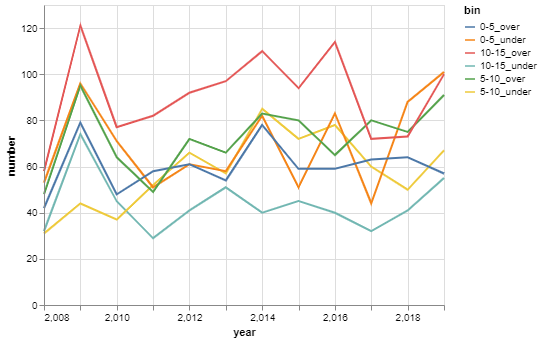

In [13]:
alt.Chart(source).mark_line().encode(
    x='year',
    y='number',
    color='bin'
)